In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

---

---
#What is the price of a house in Wicker Park with the following characteristics:
###Single Family Home
###3.96 miles from Lake Michigan
###2 baths
###110 years old
###Lot size 3049 sf
###House size 3154 sf
###Local Crime Index is 3.76
###School Index is 16.7
---

---

In [2]:
data = pd.read_csv("/Users/mrgholt/GADS-22-NYC/Datasets/chicagohouseprices-V2.csv")

In [3]:
data.describe()

,Price,Bath,Miles to Lake
count,13819.000000,7881.000000,13819.000000
mean,310395.354222,1.661845,7.904842
std,1101170.070404,0.857619,122.069613
min,20100.000000,1.000000,0.000000
25%,117000.000000,1.000000,1.260000
50%,205000.000000,1.000000,3.760000
75%,322000.000000,2.000000,8.060000
max,81984500.000000,10.000000,4786.940000


In [4]:
for col in data.columns:
    print col, '  :  ', 

Address   :   Neighborhood   :   House Type   :   Price   :   Bath   :   Crime Index   :   Minutes to Loop   :   Miles to Lake   :   Age   :   Lot (sqft)   :   SIZE (sqft)   :   School Index   :  


In [5]:
data.columns = ["Address", "Neighborhood", "Type", "Price", "Baths", \
                "CI", "Mins_to_Loop", "Miles_to_Lake", "Age", "Lot_size", "House_size", "SI"]

In [6]:
for col in data.columns:
    print col, '  :  ', 

Address   :   Neighborhood   :   Type   :   Price   :   Baths   :   CI   :   Mins_to_Loop   :   Miles_to_Lake   :   Age   :   Lot_size   :   House_size   :   SI   :  


In [7]:
data.head()

,Address,Neighborhood,Type,Price,Baths,CI,Mins_to_Loop,Miles_to_Lake,Age,Lot_size,House_size,SI
0,"3713 N Clifton Ave, Chicago IL",Wrigleyville,Single-Family Home,530000,1,2.7,14,0.91,119,3049,1562,75
1,"1100 W Cornelia Ave, Chicago IL",Wrigleyville,Condo,292500,NaN,5.12,14,1.01,37,.,.,21.2
2,"3718 N Kenmore Ave, Chicago IL",Wrigleyville,Multi-Family Home,510000,3,2.4,14,0.80,119,3049,2456,75
3,"3763 N Wilton Ave #65, Chicago IL",Wrigleyville,Condo,529000,NaN,2.4,14,0.59,109,.,.,75
4,"3763 N Wilton Ave #3, Chicago IL",Wrigleyville,Condo,529000,NaN,2.4,14,0.59,109,.,.,75


In [8]:
data.tail()

,Address,Neighborhood,Type,Price,Baths,CI,Mins_to_Loop,Miles_to_Lake,Age,Lot_size,House_size,SI
13814,"2800 N Lake Shore Dr #1710, Chicago IL",NaN,Condo,306000,NaN,0.75,7,0.05,42,.,.,33.3
13815,"340 W Diversey Pkwy #121, Chicago IL",NaN,Condo,797500,NaN,1.92,9,0.10,55,.,.,33.3
13816,"340 W Diversey Pkwy #1216, Chicago IL",NaN,Condo,797500,NaN,1.92,9,0.10,55,.,.,33.3
13817,"340 W Diversey Pkwy, Chicago IL",NaN,Condo,797500,NaN,1.92,9,0.10,55,.,.,33.3
13818,"1238 W Fletcher St #H, Chicago IL",NaN,Condo,455000,NaN,6.42,14,1.41,22,.,.,21.2


In [9]:
data.dtypes

Address           object
Neighborhood      object
Type              object
Price              int64
Baths            float64
CI                object
Mins_to_Loop      object
Miles_to_Lake    float64
Age               object
Lot_size          object
House_size        object
SI                object
dtype: object

In [10]:
data['Price'] = data['Price'].astype(float)

In [11]:
def convert_dot_to_nan(x):
    if x == '.':
        return np.nan
    else:
        return x

In [12]:
data = data.applymap(convert_dot_to_nan)

In [14]:
#This will generate an error
#Inspect the last line of the error message for the clue as to the problem
data['Mins_to_Loop'] = data['Mins_to_Loop'].astype(float)

ValueError: could not convert string to float: #1

##Diagnosing the problem converting 'Mins_to_Loop'

In [15]:
#The Mins_to_Loop columns looks like a column of strings
print type(data.Mins_to_Loop[0])

<type 'str'>


In [16]:
#See if we can tease out anomalous data types within the column

mtl = data.Mins_to_Loop.values
count_str = 0
count_non_str = 0
count_nan = 0
first = 0

for i in mtl:
    if isinstance(i, str):
        count_str += 1
    else:
        count_non_str += 1
        if i is np.nan:
            count_nan += 1
        elif not first:
            print type(i)
            print i
            first = 1
        
print "found {:d} non-strings among {:d} strings".format(count_non_str, count_str)
print "found {:d} nans".format(count_nan)

found 271 non-strings among 13548 strings
found 271 nans


In [20]:
#The nans are fine, but should not be the reason why the strings will not convert to floats
#Try converting the string individually
#The error thrown is the same as above

for i in mtl:
    if isinstance(i, str):
        temp = float(i)

ValueError: could not convert string to float: #1

In [19]:
#The hash problem accounts for all the data points that appear to cause a problem on attempted conversion to floats

count_hash = 0
count_str = 0
count_non_hash = 0
for i in mtl:
    if isinstance(i, str):
        count_str += 1
        if '#' in i:
            count_hash += 1
        else:
            temp = float(i)
            count_non_hash += 1

print "total count is {:d}, with hash is {:d}, without is {:d}".format(count_str, count_hash, count_non_hash)

total count is 13548, with hash is 9, without is 13539


In [21]:
#We can solve this the same way as we did for the dot problem
#But we only want this to work on the Series, not on the whole Data Frame
#Use apply() and not applymap()

In [22]:
def eliminate_hash(x):
    if isinstance(x, str):
        if '#' in x:
            x = x.split('#')[1]
    return x

In [23]:
data.Mins_to_Loop = data.Mins_to_Loop.apply(eliminate_hash)

In [24]:
#Now try and convert the dataframe column to a float

data['Mins_to_Loop'] = data['Mins_to_Loop'].astype(float)

In [25]:
#success
data.dtypes

Address           object
Neighborhood      object
Type              object
Price            float64
Baths            float64
CI                object
Mins_to_Loop     float64
Miles_to_Lake    float64
Age               object
Lot_size          object
House_size        object
SI                object
dtype: object

---
##Here are some other ways of addressing the problem

In [18]:
#Remove the '#' by traversing the values of the column and then reassigning the column back to the data frame
#mtl = data.Mins_to_Loop.values
#for i, j in enumerate(mtl):
#    if isinstance(j, str):
#        if '#' in j:
#            mtl[i] = j.split('#')[1]
#    
#data.Mins_to_Loop = mtl

In [21]:
#A different way of detecting the "#" strings
#Since the problem has been fixed above this will not return any "found" messages
#
#mtl = data.Mins_to_Loop
#for i in mtl.values:
#    try:
#        temp = float(i)
#    except:
#        print i
#        print "found"

---

In [26]:
data['Lot_size'] = data['Lot_size'].astype(float)
data['House_size'] = data["House_size"].astype(float)
data['CI'] = data['CI'].astype(float)
data['Age'] = data['Age'].astype(float)
data['SI'] = data['SI'].astype(float)

In [27]:
data.head()

,Address,Neighborhood,Type,Price,Baths,CI,Mins_to_Loop,Miles_to_Lake,Age,Lot_size,House_size,SI
0,"3713 N Clifton Ave, Chicago IL",Wrigleyville,Single-Family Home,530000,1,2.70,14,0.91,119,3049,1562,75.0
1,"1100 W Cornelia Ave, Chicago IL",Wrigleyville,Condo,292500,NaN,5.12,14,1.01,37,NaN,NaN,21.2
2,"3718 N Kenmore Ave, Chicago IL",Wrigleyville,Multi-Family Home,510000,3,2.40,14,0.80,119,3049,2456,75.0
3,"3763 N Wilton Ave #65, Chicago IL",Wrigleyville,Condo,529000,NaN,2.40,14,0.59,109,NaN,NaN,75.0
4,"3763 N Wilton Ave #3, Chicago IL",Wrigleyville,Condo,529000,NaN,2.40,14,0.59,109,NaN,NaN,75.0


In [28]:
data.corr()

,Price,Baths,CI,Mins_to_Loop,Miles_to_Lake,Age,Lot_size,House_size,SI
Price,1.000000,0.200522,-0.022065,-0.146037,-0.005925,-0.003845,-0.040936,0.197170,-0.007975
Baths,0.200522,1.000000,0.247376,-0.365098,-0.008330,0.348152,-0.066825,0.823201,0.013352
CI,-0.022065,0.247376,1.000000,-0.168147,-0.017068,0.300661,-0.149890,0.246106,-0.073932
Mins_to_Loop,-0.146037,-0.365098,-0.168147,1.000000,0.023962,-0.193161,0.410327,-0.308517,-0.042565
Miles_to_Lake,-0.005925,-0.008330,-0.017068,0.023962,1.000000,0.009497,-0.000999,-0.013612,0.014774
Age,-0.003845,0.348152,0.300661,-0.193161,0.009497,1.000000,-0.181263,0.294314,-0.039244
Lot_size,-0.040936,-0.066825,-0.149890,0.410327,-0.000999,-0.181263,1.000000,0.032054,-0.009649
House_size,0.197170,0.823201,0.246106,-0.308517,-0.013612,0.294314,0.032054,1.000000,0.009744
SI,-0.007975,0.013352,-0.073932,-0.042565,0.014774,-0.039244,-0.009649,0.009744,1.000000


In [30]:
def plot_features(df):
    fig = plt.figure(figsize=(15, 15))
    ax = plt.subplot(331)
    ax.set_title("Baths vs Price")
    ax.set_xlabel("Number of Baths")
    ax.set_ylabel("Price")
    ax.set_xlim(0,5)
    ax.plot(df.Baths, df.Price, '.')
    
    ax1 = plt.subplot(332)
    ax1.set_title("Crime Index vs Price")
    ax1.set_xlabel("Crime Index")
    ax1.set_ylabel("Price")
    ax1.plot(df.CI, df.Price, '.')
    
    ax2 = plt.subplot(333)
    ax2.set_title("Miles to the Lake vs Price")
    ax2.set_xlabel("Miles to the Lake")
    ax2.set_ylabel("Price")
    ax2.plot(df.Miles_to_Lake, df.Price, '.')
    
    ax3 = plt.subplot(334)
    ax3.set_title("Age vs Price")
    ax3.set_xlabel("Age")
    ax3.set_ylabel("Price")
    ax3.plot(df.Age, df.Price, '.')
    
    ax4 = plt.subplot(335)
    ax4.set_title("Lot Size vs Price")
    ax4.set_xlabel("Lot Size")
    ax4.set_ylabel("Price")
    ax4.plot(df.Lot_size, df.Price, '.')
    
    ax5 = plt.subplot(336)
    ax5.set_title("House Size vs Price")
    ax5.set_xlabel("House Size")
    ax5.set_ylabel("Price")
    ax5.plot(df.House_size, df.Price, '.')
    
    ax6 = plt.subplot(337)
    ax6.set_title("School Index vs Price")
    ax6.set_xlabel("School Index")
    ax6.set_ylabel("Price")
    ax6.plot(df.SI, df.Price, '.')
    
    ax7 = plt.subplot(338)
    ax7.set_title("Minutes to the Loop vs Price")
    ax7.set_xlabel("Mins to the Loop")
    ax7.set_ylabel("Price")
    ax7.plot(df.Mins_to_Loop, df.Price, '.')
    
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)

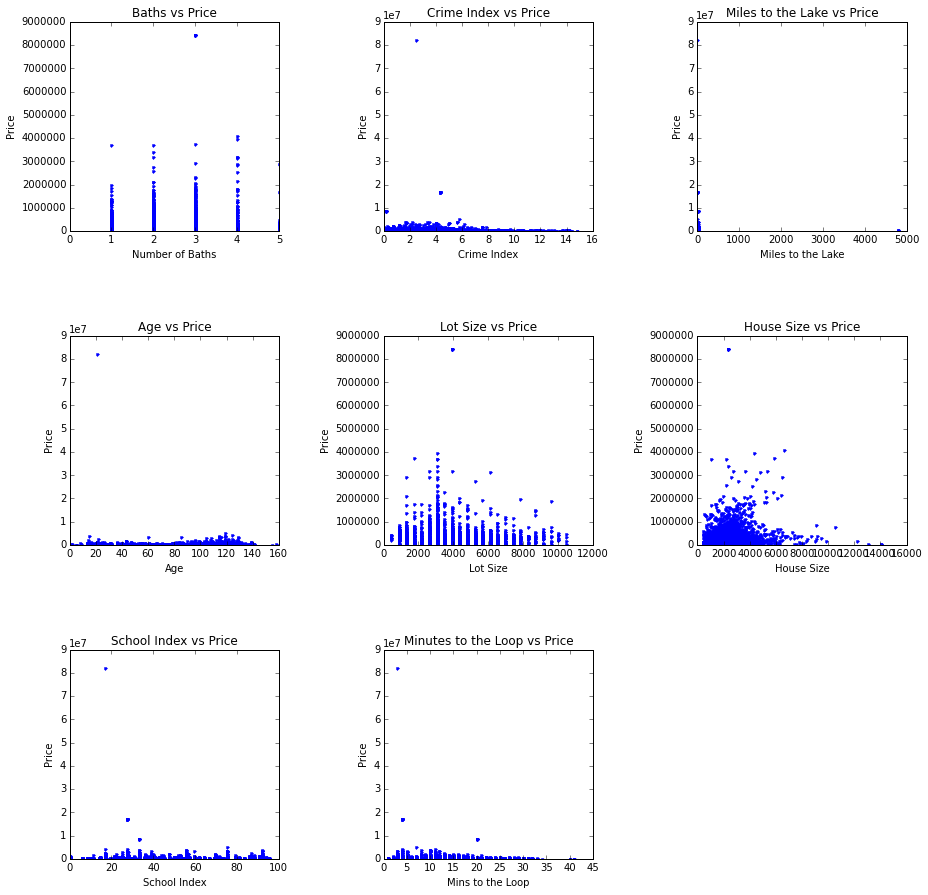

In [31]:
plot_features(data)

In [32]:
#This is just a heuristic for finding outliers

def get_outlier_thresholds(x):
    lower_25 = x.quantile(0.25)
    upper_75 = x.quantile(0.75)
    high_threshold = upper_75 + 1.5 * (upper_75-lower_25)
    low_threshold = lower_25 - 1.5 * (upper_75-lower_25)
    return(low_threshold, high_threshold)

In [33]:
def remove_outliers(x, low, high):
    if x > high:
        return np.nan
    elif x < low:
        return np.nan
    else:
        return x

In [34]:
low, high = get_outlier_thresholds(data.Price)
print low, high

-190500.0 629500.0


In [36]:
#I used a lambda function here because map() is easy to use as long as there is only 1 argument
#To use remove_outliers() directly in map I would have had to handle this
#The lambda allows me to have a single argument in the function but still call remove_outliers with 'low' and 'high
new_price = data.Price.map((lambda x: remove_outliers(x, low, high)))

##Looking at the plots price has an obvious outlier
##Let's remove it

In [37]:
data.Price = new_price

In [38]:
low, high = get_outlier_thresholds(data.Miles_to_Lake)
print low, high

-8.94 18.26


##Miles to lake also has an obvious outlier problem

In [39]:
new_miles_to_lake = data.Miles_to_Lake.map((lambda x: remove_outliers(x, low, high)))

In [40]:
data.Miles_to_Lake = new_miles_to_lake

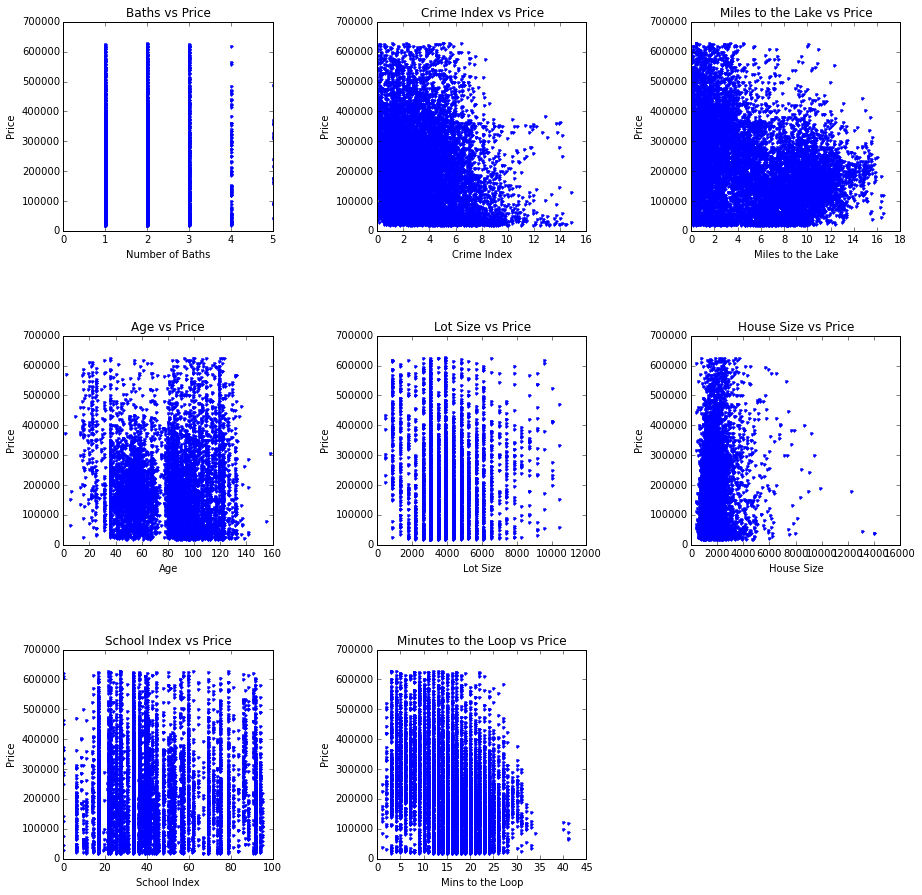

In [41]:
plot_features(data)

In [43]:
#Now constrain the dataset to single family homes
#The mask will find all entries that contain the lowercase word 'single'
#Not bullet-proof as single might be mispelled

mask = ["single" in str(ht).lower() for ht in data['Type'].values]

In [44]:
#create a new data frame for single family homes
sfh_data = data[mask]

In [45]:
#sfh_data.describe()

,Price,Baths,CI,Mins_to_Loop,Miles_to_Lake,Age,Lot_size,House_size,SI
count,4625.000000,4827.000000,4797.000000,4850.000000,4895.000000,4655.000000,4802.000000,4799.000000,4895.000000
mean,183193.329297,1.248602,2.533037,19.856289,7.654358,76.138990,4134.356726,1291.699312,39.763248
std,116881.401249,0.533518,2.355971,4.567923,3.691285,24.480916,1158.649517,540.496116,20.011354
min,20500.000000,1.000000,0.000000,2.000000,0.010000,1.000000,871.000000,392.000000,0.000000
25%,101000.000000,1.000000,0.750000,17.000000,4.860000,55.000000,3485.000000,990.000000,27.300000
50%,165000.000000,1.000000,1.780000,20.000000,8.240000,79.000000,3920.000000,1138.000000,33.300000
75%,235000.000000,1.000000,3.500000,23.000000,10.390000,93.000000,4792.000000,1426.500000,44.400000
max,629500.000000,6.000000,14.830000,40.000000,16.480000,155.000000,10454.000000,6598.000000,95.200000


In [46]:
#Let's have a look at the correlation coefficients 

sfh_data.corr()

,Price,Baths,CI,Mins_to_Loop,Miles_to_Lake,Age,Lot_size,House_size,SI
Price,1.000000,0.194775,-0.367152,-0.120745,-0.096534,-0.032905,0.189422,0.346254,0.065814
Baths,0.194775,1.000000,0.036663,-0.240031,-0.242982,0.196699,0.036925,0.697420,0.014874
CI,-0.367152,0.036663,1.000000,-0.215700,-0.263214,0.308311,-0.172324,0.027423,-0.048321
Mins_to_Loop,-0.120745,-0.240031,-0.215700,1.000000,0.338026,-0.400382,0.327423,-0.222748,-0.058147
Miles_to_Lake,-0.096534,-0.242982,-0.263214,0.338026,1.000000,-0.359283,0.179801,-0.286761,0.053457
Age,-0.032905,0.196699,0.308311,-0.400382,-0.359283,1.000000,-0.133804,0.165994,0.006055
Lot_size,0.189422,0.036925,-0.172324,0.327423,0.179801,-0.133804,1.000000,0.135450,-0.020537
House_size,0.346254,0.697420,0.027423,-0.222748,-0.286761,0.165994,0.135450,1.000000,0.039308
SI,0.065814,0.014874,-0.048321,-0.058147,0.053457,0.006055,-0.020537,0.039308,1.000000


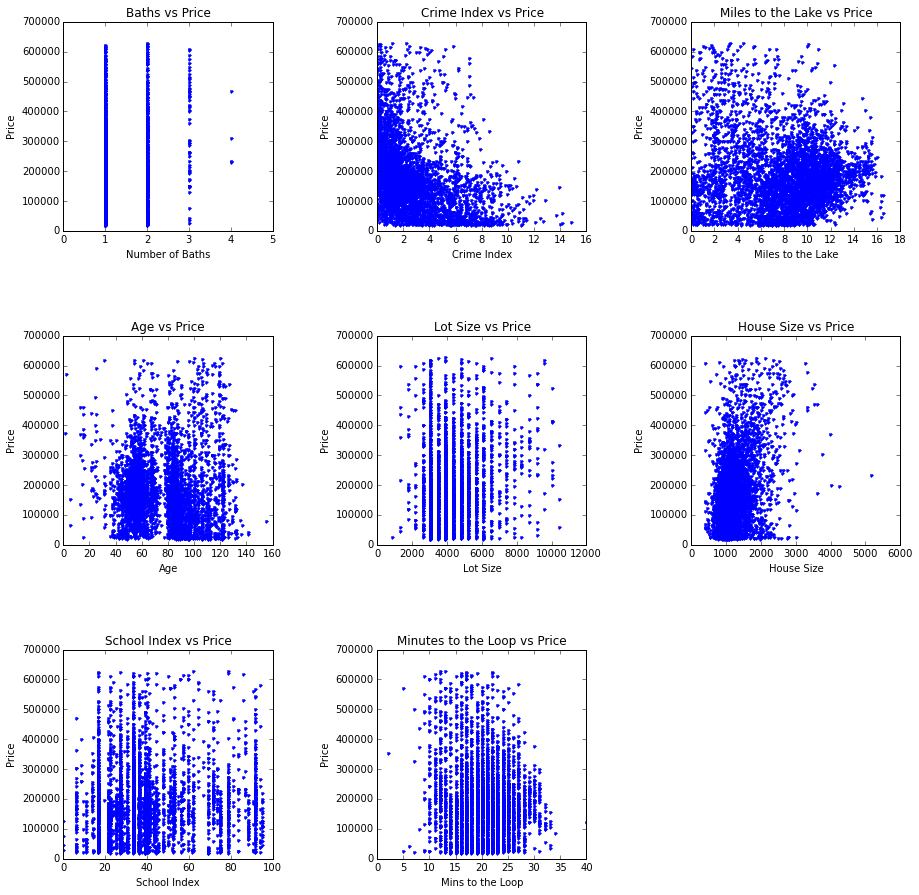

In [47]:
#And now replot
plot_features(sfh_data)

##Now constrain the problem to houses in the neighborhood of Wicker Park
##Again I use the list comprehension and the lowercase word 'wicker'

In [48]:
mask = ["wicker" in str(ht).lower() for ht in sfh_data['Neighborhood'].values]

In [57]:
wpark_data = sfh_data[mask]

##Alternatively

In [40]:
#sfh_wp_data=sfh_data[sfh_data.Neighborhood == "Wicker Park"]

##We are down to only 9 data points!
##Clearly domain knowledge about housing in Chicago would be essential here
##For example you would really want to filter for houses in 'like' neighborhoods 

In [58]:
wpark_data.describe()

,Price,Baths,CI,Mins_to_Loop,Miles_to_Lake,Age,Lot_size,House_size,SI
count,9.000000,31.000000,31.000000,31.000000,31.000000,23.000000,31.000000,30.000000,31.000000
mean,395111.111111,2.000000,4.752903,9.903226,3.442258,89.130435,3049.258065,1979.966667,47.161290
std,129538.309434,0.966092,1.055633,2.467858,0.353541,47.928265,960.886916,895.824547,18.954923
min,245000.000000,1.000000,1.400000,7.000000,2.860000,8.000000,1742.000000,392.000000,16.700000
25%,300000.000000,1.000000,4.650000,9.000000,3.180000,27.000000,2614.000000,1225.500000,34.700000
50%,326000.000000,2.000000,4.930000,9.000000,3.400000,115.000000,3049.000000,1977.000000,40.800000
75%,495000.000000,3.000000,5.580000,10.000000,3.695000,122.500000,3049.000000,2610.000000,59.500000
max,610000.000000,4.000000,5.990000,22.000000,4.080000,131.000000,7405.000000,3858.000000,93.900000


In [59]:
wpark_data.corr()

,Price,Baths,CI,Mins_to_Loop,Miles_to_Lake,Age,Lot_size,House_size,SI
Price,1.000000,-0.200070,0.287717,-0.051092,-0.300628,-0.615696,-0.228401,-0.061443,-0.135956
Baths,-0.200070,1.000000,0.399736,0.335546,-0.256671,-0.217752,-0.140687,0.868406,-0.081002
CI,0.287717,0.399736,1.000000,0.172846,-0.116869,0.247187,-0.208220,0.392431,-0.016237
Mins_to_Loop,-0.051092,0.335546,0.172846,1.000000,0.310864,0.056104,0.098015,0.400096,-0.191911
Miles_to_Lake,-0.300628,-0.256671,-0.116869,0.310864,1.000000,0.177051,0.381170,-0.095171,-0.117620
Age,-0.615696,-0.217752,0.247187,0.056104,0.177051,1.000000,-0.261901,-0.094026,0.042016
Lot_size,-0.228401,-0.140687,-0.208220,0.098015,0.381170,-0.261901,1.000000,-0.118141,0.140950
House_size,-0.061443,0.868406,0.392431,0.400096,-0.095171,-0.094026,-0.118141,1.000000,-0.071581
SI,-0.135956,-0.081002,-0.016237,-0.191911,-0.117620,0.042016,0.140950,-0.071581,1.000000


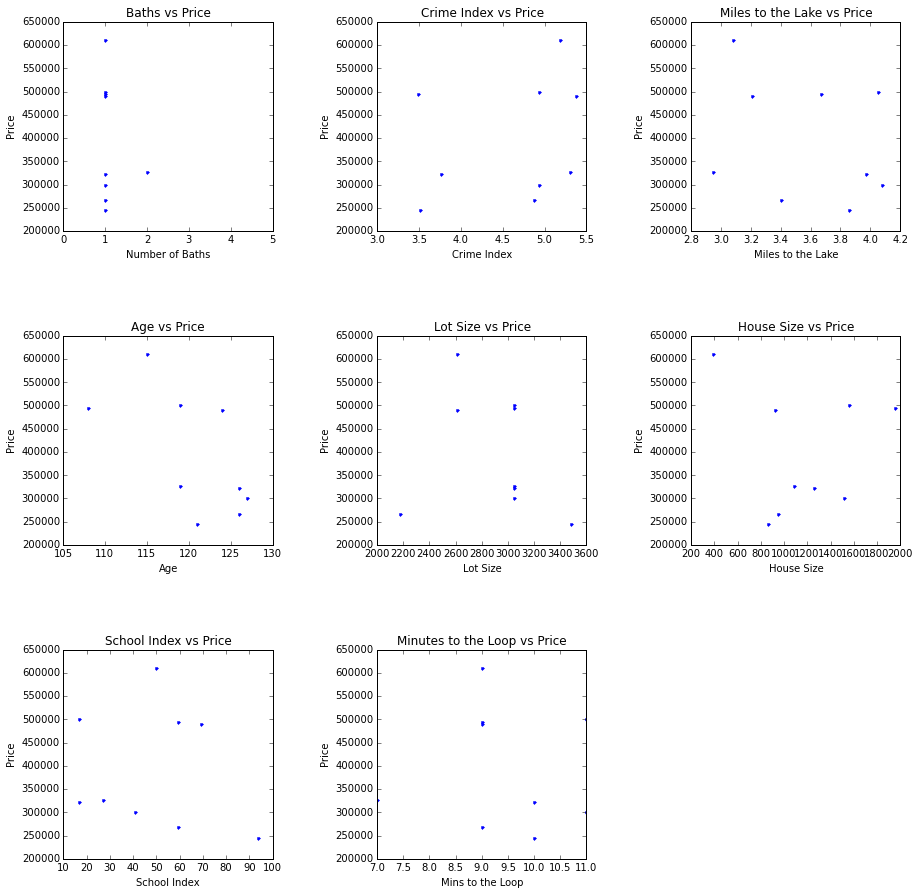

In [60]:
plot_features(wpark_data)

##Within the Wicker Park subset there is still a price outlier

In [64]:
low, high = get_outlier_thresholds(wpark_data.Price)
print low, high

7500.0 787500.0


In [65]:
new_price = wpark_data.Price.map((lambda x: remove_outliers(x, low, high)))

In [66]:
wpark_data.Price = new_price

In [67]:
final_df = wpark_data[['Age', 'Miles_to_Lake', 'CI', 'Lot_size',  'Price']]

In [68]:
final_df = final_df.dropna()

In [70]:
final_df.corr()

,Age,Miles_to_Lake,CI,Lot_size,Price
Age,1.000000,0.236536,0.269478,-0.194457,-0.615696
Miles_to_Lake,0.236536,1.000000,-0.544624,0.504400,-0.300628
CI,0.269478,-0.544624,1.000000,-0.560011,0.287717
Lot_size,-0.194457,0.504400,-0.560011,1.000000,-0.228401
Price,-0.615696,-0.300628,0.287717,-0.228401,1.000000


In [71]:
final_df.describe()

,Age,Miles_to_Lake,CI,Lot_size,Price
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,120.555556,3.585556,4.595556,2904.000000,395111.111111
std,6.186904,0.436667,0.779152,377.154146,129538.309434
min,108.000000,2.950000,3.490000,2178.000000,245000.000000
25%,119.000000,3.210000,3.760000,2614.000000,300000.000000
50%,121.000000,3.670000,4.930000,3049.000000,326000.000000
75%,126.000000,3.970000,5.180000,3049.000000,495000.000000
max,127.000000,4.080000,5.380000,3485.000000,610000.000000


In [73]:
clf = linear_model.LinearRegression(fit_intercept=True)
clf.fit (final_df[['Age', 'Miles_to_Lake', 'CI', 'Lot_size']], final_df.Price)
print "The parameters of the model are ", clf.coef_
print "The intercept parameter is ", clf.intercept_ 

The parameters of the model are  [ -1.90784346e+04   1.08653416e+05   9.74078337e+04  -9.00663382e+01]
The intercept parameter is  2119449.06305


In [78]:
hp = clf.predict([[110, 3.96, 3.76, 3049]])
print "The price of the house is predicted to be ${:5.2f}".format(hp[0])

The price of the house is predicted to be $542729.98
